In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:

df = pd.read_csv('Assignment 9.csv')


print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [5]:

X = df.drop(columns=['medv'])  
y = df['medv'] 

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

model = LinearRegression()


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

In [9]:

mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred) 

In [10]:

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 24.2911194749735
Root Mean Squared Error: 4.928602182665334
R-squared: 0.6687594935356322


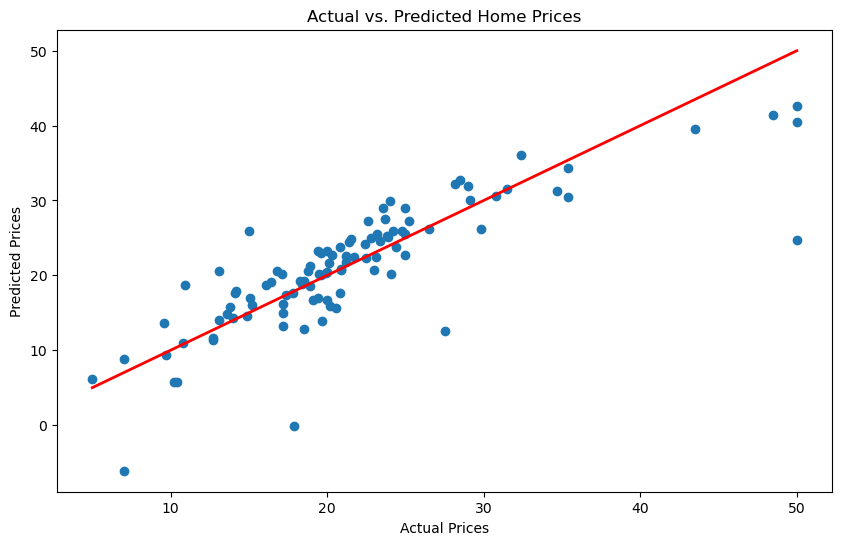

In [11]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Home Prices')
plt.show()

In [21]:
def predict_price(user_input):
 
    user_input_scaled = scaler.transform([user_input])
    
    predicted_price_scaled = model.predict(user_input_scaled)
    
    predicted_price_original = predicted_price_scaled * y.std() + y.mean()  # Inverse of standardization
    
    return predicted_price_original[0]

user_input = [
    0.0,   
    18.0,  
    2.3,   # INDUS: Proportion of non-retail business acres per town
    0.0,   # CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    0.5,   # NOX: Nitrogen oxide concentration (parts per 10 million)
    6.5,   # RM: Average number of rooms per dwelling
    80.0,  # AGE: Proportion of owner-occupied units built before 1940
    4.3,   # DIS: Weighted distance to employment centers
    5.0,   # RAD: Index of accessibility to radial highways
    3.0, # TAX: Property tax rate (per $10,000)
    18.0,  # PTRATIO: Pupil-teacher ratio by town
    390.0, # B: Proportion of residents of African American descent
    5.0    # LSTAT: Percentage of lower status population
]

# Predict the price
predicted_price = predict_price(user_input)

# Output the predicted price
print(f"The predicted price for the house is: ${predicted_price:.2f}")

The predicted price for the house is: $312.05


F:\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
